Enter the path to the image: /content/C:/dataset_images/3/image_615.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Emotion: Happy


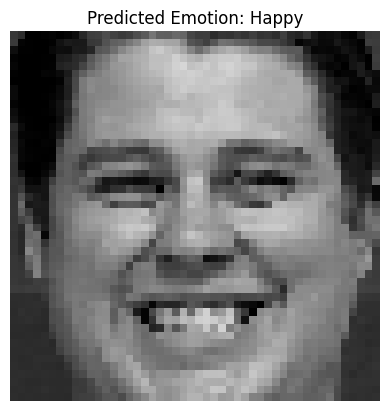

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt

model = load_model("facial_expression_model.h5")


emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


def preprocess_image(image_path):
   
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    img = cv2.resize(img, (48, 48)) 
    img = img.reshape(1, 48, 48, 1) 
    img = img / 255.0 
    return img


def predict_expression(image):
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]  
    return emotion_labels[predicted_class]

# Main function to run the prediction
def main():
    # Input image path
    image_path = input("Enter the path to the image: ")

    # Preprocess the image
    image = preprocess_image(image_path)

    # Predict the emotion
    emotion = predict_expression(image)

    # Display the result
    print(f"Predicted Emotion: {emotion}")

    # Display the uploaded image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color for displaying with matplotlib
    plt.imshow(img)
    plt.title(f"Predicted Emotion: {emotion}")
    plt.axis('off')
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

df = pd.read_csv("/content/ckextended.csv")
X, y = [], []
for i in range(len(df)):
    pixels = np.array(df["pixels"][i].split(), dtype='float32').reshape(48, 48, 1)
    X.append(pixels)
    y.append(df["emotion"][i])

X = np.array(X) / 255.0  # Normalize pixel values
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical
num_classes = len(set(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
accuracy = model.evaluate(X_test, y_test)[1] * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Save model
model.save("facial_expression_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.5021 - loss: 1.7800 - val_accuracy: 0.6413 - val_loss: 1.3911
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.6453 - loss: 1.3706 - val_accuracy: 0.6413 - val_loss: 1.3339
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.6751 - loss: 1.3067 - val_accuracy: 0.6413 - val_loss: 1.3254
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - accuracy: 0.6694 - loss: 1.3310 - val_accuracy: 0.6413 - val_loss: 1.3284
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.6546 - loss: 1.3085 - val_accuracy: 0.6413 - val_loss: 1.3163
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.6191 - loss: 1.3676 - val_accuracy: 0.6413 - val_loss: 1.2779
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.6303 - loss: 1.3139 - val_accuracy: 0.6413 - val_loss: 1.2349
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.6522 - loss: 1.2034 - val_accuracy: 0.

Test Accuracy: 85.33%


In [13]:
import pandas as pd
import numpy as np
import os
import cv2

# Load dataset
df = pd.read_csv("ckextended.csv")  # Replace with your dataset

# Define output directory on the Desktop (for example)
output_dir = "C:/dataset_images"
os.makedirs(output_dir, exist_ok=True)

# Loop through the dataset and save images
for index, row in df.iterrows():
    pixels = np.array(row["pixels"].split(), dtype=np.uint8).reshape(48, 48)  # Reshape to 48x48
    label = str(row["emotion"])  # Emotion label

    # Create label directory
    label_dir = os.path.join(output_dir, label)
    os.makedirs(label_dir, exist_ok=True)

    # Save image
    img_path = os.path.join(label_dir, f"image_{index}.png")
    cv2.imwrite(img_path, pixels)

    if index % 100 == 0:
        print(f"Saved {index} images...")

print("Image conversion completed!")


Saved 0 images...
Saved 100 images...
Saved 200 images...
Saved 300 images...
Saved 400 images...
Saved 500 images...
Saved 600 images...
Saved 700 images...
Saved 800 images...
Saved 900 images...
Image conversion completed!
